In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from pandarallel import pandarallel
import string
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from nltk import word_tokenize, pos_tag, ne_chunk
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBClassifier
import csv

### Pré-processamento melhor

In [2]:
true_df = pd.read_csv('noticias_combinedtrue.csv')
false_df = pd.read_csv('noticias_combinedfake.csv')

#Remover maiúsculas
true_df['corpo_texto'] = true_df['corpo_texto'].str.lower()
true_df['title'] = true_df['title'].str.lower()
true_df['corpo_texto'] = true_df['corpo_texto'].apply(nltk.word_tokenize)
#true_df['title'] = true_df['title'].apply(nltk.word_tokenize)

false_df['corpo_texto'] = false_df['corpo_texto'].str.lower()
false_df['title'] = false_df['title'].str.lower()
false_df['corpo_texto'] = false_df['corpo_texto'].apply(nltk.word_tokenize)
#false_df['title'] = false_df['title'].apply(nltk.word_tokenize)

stop_words = set(stopwords.words('portuguese'))

#função para remover pontuação
def clean_text(tokens):
    return [re.sub(r'[^\w\s]', '', word) for word in tokens if word not in stop_words and re.sub(r'[^\w\s]', '', word)]

#Remover stop_words

true_df['corpo_texto'] = true_df['corpo_texto'].apply(clean_text)
false_df['corpo_texto'] = false_df['corpo_texto'].apply(clean_text)
#true_df['title'] = true_df['title'].apply(clean_text)
#false_df['title'] = false_df['title'].apply(clean_text)

display(true_df, false_df)

,title,link,date,Site,noticia_falsa,corpo_texto
0,covid-19,https://www.gov.br/saude/pt-br/assuntos/covid-19,Data não disponível,gov.br saude,1,"[covid19, ministério, saúde, ir, conteúdo, 1, ..."
1,vacinação,https://www.gov.br/saude/pt-br/vacinacao,Data não disponível,gov.br saude,1,"[vacinação, ministério, saúde, ir, conteúdo, 1..."
2,calendário de vacinação,https://www.gov.br/saude/pt-br/vacinacao/calen...,Data não disponível,gov.br saude,1,"[calendário, vacinação, ministério, saúde, ir,..."
3,calendário técnico nacional de vacinação,https://www.gov.br/saude/pt-br/vacinacao/calen...,Data não disponível,gov.br saude,1,"[calendário, técnico, nacional, vacinação, min..."
4,atividades de vacinação de alta qualidade,https://www.gov.br/saude/pt-br/vacinacao/avaq,Data não disponível,gov.br saude,1,"[atividades, vacinação, alta, qualidade, avaq,..."
...,...,...,...,...,...,...
355,decathlon recomendou que pessoas do grupo de r...,http://www.e-farsas.com/decathlon-recomendou-q...,Data não disponível,E-Farsas (Verdadeiros),1,"[decathlon, recomendou, pessoas, grupo, risco,..."
356,governo do maranhão vem fornecendo kits com cl...,http://www.e-farsas.com/governo-do-maranhao-ve...,Data não disponível,E-Farsas (Verdadeiros),1,"[governo, maranhão, vem, fornecendo, kits, clo..."
357,“kit covid-19” para combater o novo coronavíru...,http://www.e-farsas.com/kit-covid-19-para-comb...,Data não disponível,E-Farsas (Verdadeiros),1,"[kit, covid19, combater, novo, coronavírus, ve..."
358,"autoridades, parem de distorcer fatos sobre a ...",http://www.e-farsas.com/autoridades-parem-de-d...,Data não disponível,E-Farsas (Verdadeiros),1,"[autoridades, parem, distorcer, fatos, sobre, ..."


,title,link,date,Site,noticia_falsa,corpo_texto
0,é verdade que o número 95004-1117 aplica o gol...,http://www.e-farsas.com/e-verdade-que-o-numero...,Data não disponível,E-Farsas (Falso),0,"[verdade, número, 950041117, aplica, golpe, va..."
1,a pfizer mudou de nome para viatris para não s...,http://www.e-farsas.com/a-pfizer-mudou-de-nome...,Data não disponível,E-Farsas (Falso),0,"[pfizer, mudou, nome, viatris, responsabilizad..."
2,homem dado como morto pela covid em parauapeba...,http://www.e-farsas.com/homem-dado-como-morto-...,Data não disponível,E-Farsas (Falso),0,"[homem, dado, morto, covid, parauapebas, ressu..."
3,uma patente para um teste de covid-19 foi feit...,http://www.e-farsas.com/uma-patente-para-um-te...,Data não disponível,E-Farsas (Falso),0,"[patente, teste, covid19, feita, 2015, home, s..."
4,o menino luca morreu de parada cardíaca após s...,http://www.e-farsas.com/o-menino-luca-morreu-d...,Data não disponível,E-Farsas (Falso),0,"[menino, luca, morreu, parada, cardíaca, após,..."
...,...,...,...,...,...,...
306,monitoramento dos dados de vacinação,https://www.gov.br/saude/pt-br/vacinacao/monit...,Data não disponível,Gov - Fake,0,"[monitoramento, dados, vacinação, ministério, ..."
307,aquisição emergencial de 25 mil doses,https://agenciagov.ebc.com.br/noticias/202408/...,2024-08-20T16:41:40.382Z,Fato ou fake (G1),0,"[saúde, negocia, aquisição, 25, mil, doses, va..."
308,fake news sobre nanobots em vacinas contra cov...,https://www.boatos.org/saude/nanobots-foram-en...,2024-08-24T15:58:34-03:00,boatos.org,0,"[nanobots, encontrados, milhões, pessoas, vaci..."
309,é falso que brasil seja o único país do mundo ...,https://www.boatos.org/saude/brasil-e-o-unico-...,2024-08-24T15:58:34-03:00,boatos.org,0,"[brasil, único, país, exigir, vacina, contra, ..."


In [3]:
lista_tokens1 = true_df['corpo_texto'].sum()

frequencia_tokenstrue = Counter(lista_tokens1)

df_frequencia_tokenstrue = pd.DataFrame(frequencia_tokenstrue.items(), columns=['token', 'ocorrencia'])
df_frequencia_tokenstrue = df_frequencia_tokenstrue.sort_values(by='ocorrencia', ascending=False)

display(df_frequencia_tokenstrue)

,token,ocorrencia
2,saúde,10768
136,vacinação,4153
200,serviços,2512
192,públicas,2333
161,dados,2228
...,...,...
12381,facadas,1
12382,estuprando,1
12383,desafio,1
7169,1qf0aޤc,1


In [4]:
lista_tokens2 = false_df['corpo_texto'].sum()

frequencia_tokensfalse = Counter(lista_tokens2)

df_frequencia_tokensfalse = pd.DataFrame(frequencia_tokensfalse.items(), columns=['token', 'ocorrencia'])
df_frequencia_tokensfalse = df_frequencia_tokensfalse.sort_values(by='ocorrencia', ascending=False)

display(df_frequencia_tokensfalse)

,token,ocorrencia
1105,covid19,1487
0,verdade,1363
746,saúde,1353
9,sobre,1082
687,vida,1011
...,...,...
20206,bloqueio,1
20207,assustada,1
20208,desmentidas,1
20210,cujas,1


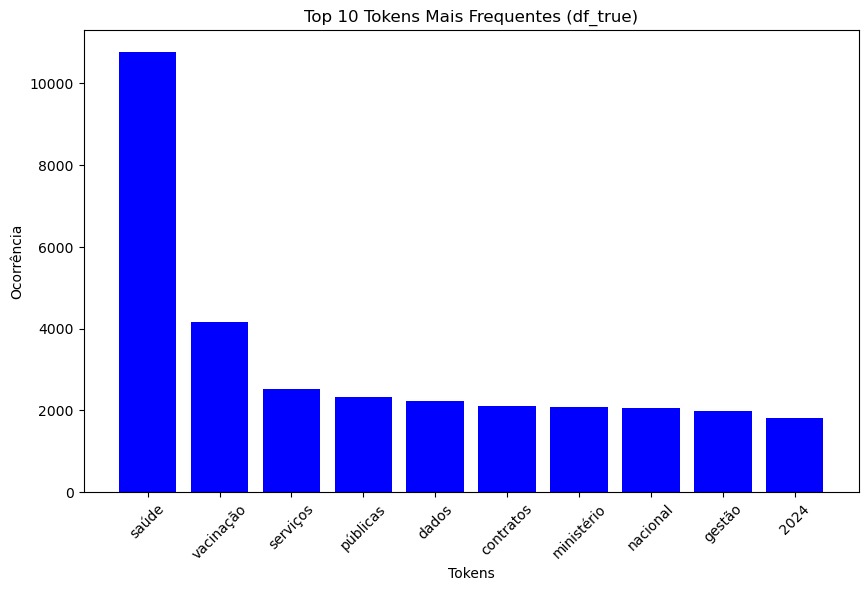

In [5]:
#selecionando os 10 tokens mais frequentes
top_10_tokens = df_frequencia_tokenstrue.head(10)

#plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_tokens['token'], top_10_tokens['ocorrencia'], color='blue')
plt.xlabel('Tokens')
plt.ylabel('Ocorrência')
plt.title('Top 10 Tokens Mais Frequentes (df_true)')
plt.xticks(rotation=45)
plt.show()

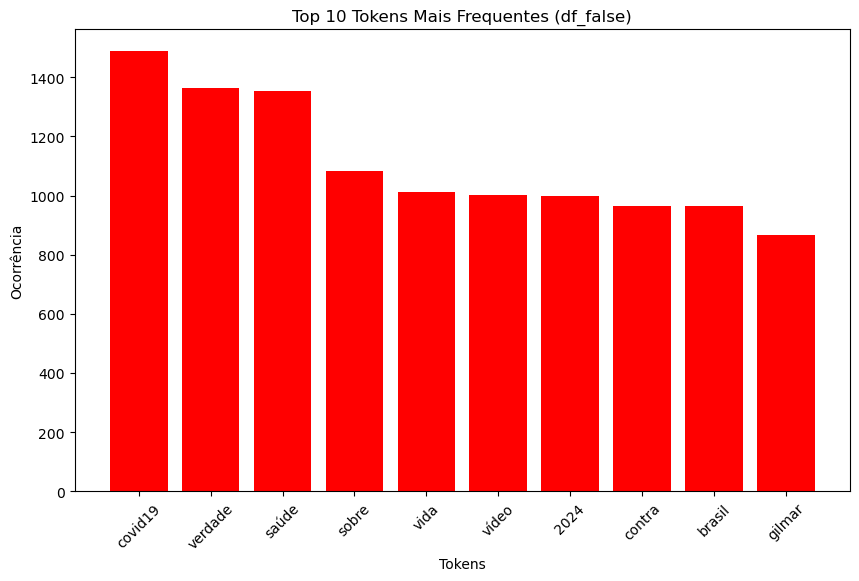

In [6]:
#selecionando os 10 tokens mais frequentes
top_10_tokens2 = df_frequencia_tokensfalse.head(10)

#plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_tokens2['token'], top_10_tokens2['ocorrencia'], color='red')
plt.xlabel('Tokens')
plt.ylabel('Ocorrência')
plt.title('Top 10 Tokens Mais Frequentes (df_false)')
plt.xticks(rotation=45)
plt.show()

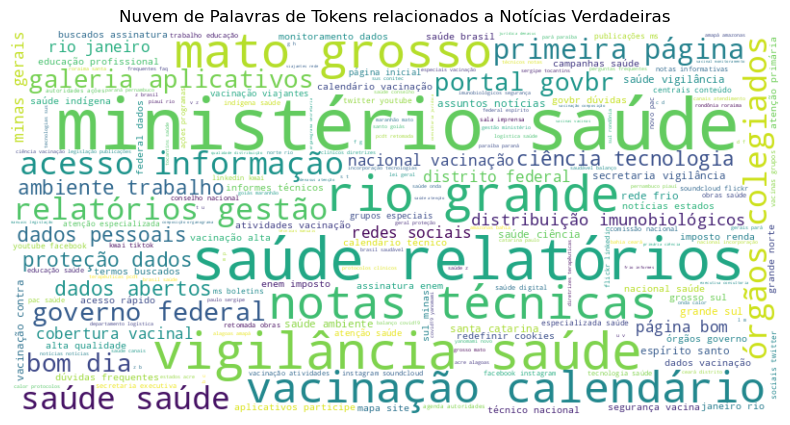

In [7]:
text1 = ' '.join(lista_tokens1)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text1)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras de Tokens relacionados a Notícias Verdadeiras')
plt.show()

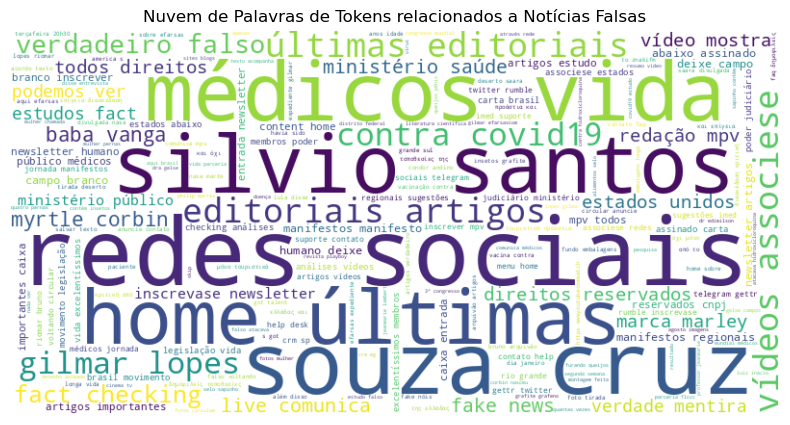

In [8]:
text2 = ' '.join(lista_tokens2)

wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras de Tokens relacionados a Notícias Falsas')
plt.show()

In [9]:
df_fakerecogna = pd.read_excel('FakeRecogna.xlsx')
df_fakerecogna = df_fakerecogna.loc[df_fakerecogna["Categoria"] == 'saúde']
df_fakerecogna = df_fakerecogna.drop(['Categoria', 'Subtitulo', 'Autor'], axis=1)
df_fakerecogna = df_fakerecogna[['Titulo', 'URL', 'Data', 'Classe', 'Noticia']]
df_fakerecogna = df_fakerecogna.rename(columns = {'Titulo':'title', 'URL': 'link', 'Data': 'date', 'Classe':'noticia_falsa','Noticia':'corpo_texto'})
df_fakerecogna['noticia_falsa'] = df_fakerecogna['noticia_falsa'].astype('int64')
df_fakerecogna

,title,link,date,noticia_falsa,corpo_texto
1,Equador prepara cova coletiva para mortos por ...,https://noticias.uol.com.br/internacional/ulti...,27/03/2020 18h25,1,o governar equador anunciar preparar cova cole...
2,Air France voltará a operar voo direto Pequim-...,https://www.uol.com.br/nossa/noticias/afp/2020...,07/08/2020 13h42,1,o companhia air france operar voar direto pequ...
3,Marfrig intensifica venda de carne do Brasil a...,https://economia.uol.com.br/noticias/reuters/2...,27/04/2020 14h53,1,o marfrig global foods retomar vender carnar b...
6,Coronavírus: sindicatos dos inquilinos convoca...,https://noticias.uol.com.br/internacional/ulti...,30/03/2020 10h38,1,greve pagamento aluguel organizar sindicato in...
9,\n\nVacina contra Covid-19 faz imunidade do co...,https://www.boatos.org/saude/vacina-contra-cov...,27/04/2021,0,“ reação vacinar entender facilidade pessoa in...
...,...,...,...,...,...
11891,\n\nVacinas estão sendo aplicadas com seringas...,https://www.boatos.org/saude/vacinas-aplicadas...,02/01/2021,0,atenção brasil simulação agulhar líquido conse...
11892,Papa vai retomar as audiências públicas das qu...,https://g1.globo.com/mundo/noticia/2020/08/26/...,26/08/2020 08h41,1,o papar francisco retomar audiência público qu...
11899,Ministro se encontra com representantes da ONU...,https://www.gov.br/saude/pt-br/assuntos/notici...,19/04/2021 19h13,1,o ministrar saudar marcelo queiroga e represen...
11900,vídeo mostrar garoto afogar ninguém nado,https://www.e-farsas.com/um-video-mostra-um-ga...,7/05/20197,0,o vídeo recentemente publicar página “ 18:18 ”...


In [10]:
# Combinar DataFrames
combined_df = pd.concat([true_df, false_df, df_fakerecogna], ignore_index=True)

# Limpar e processar a coluna 'title'
combined_df['title'] = combined_df['title'].str.replace('\n', '', regex=False)
combined_df = combined_df.dropna(subset=['title'])

# Filtrar palavras comuns (stopwords)
stop_words = set(stopwords.words('portuguese'))
combined_df['title'] = combined_df['title'].apply(
    lambda i: ' '.join(word for word in i.split() if word not in stop_words)
)

# Remover linhas com títulos vazios
non_empty_titles = combined_df['title'].apply(lambda x: len(x.strip()) > 0)
combined_df = combined_df[non_empty_titles]

# Embaralhar e resetar o índice
combined_df = shuffle(combined_df).reset_index(drop=True)

# Mostrar o DataFrame combinado
display(combined_df)

# Definir o caminho do arquivo CSV
csv_file_path = "combined_df.csv"

# Definir opções de compressão
compression_options = dict(method='zip', archive_name=csv_file_path)

# Salvar o DataFrame como CSV comprimido em um arquivo ZIP
combined_df.to_csv(f'combined_df.zip', index=False, encoding='utf-8', quoting=csv.QUOTE_ALL, escapechar='\\', compression=compression_options)

,title,link,date,Site,noticia_falsa,corpo_texto
0,Rússia introduz período quarentena 2 semanas c...,https://noticias.uol.com.br/ultimas-noticias/r...,25/12/2020 09h44,NaN,1,visitante chegar rússia vir reinar unir dever ...
1,Empresários Cuiabá vão Cuba tomar vacina Sputn...,https://www.boatos.org/saude/empresarios-cuiab...,17/03/2021,NaN,0,empresário cuiabá fretar avião tomar sputnik v...
2,FBI acusa hackers China atacar pesquisa covid-...,https://www.uol.com.br/tilt/noticias/redacao/2...,14/05/2020 11h58,NaN,1,organização pesquisar método combater covid-19...
3,Pesquisadores culpam Bolsonaro crise covid diz...,https://noticias.uol.com.br/saude/ultimas-noti...,27/04/2021 13h27,NaN,1,pesquisador brasileiro culpar o presidente jai...
4,vacina,https://www.gov.br/saude/@@search?SearchableTe...,Data não disponível,gov.br saude,1,"[ministério, saúde, ir, conteúdo, 1, ir, págin..."
...,...,...,...,...,...,...
5119,Covid-19: Brasil quer prazo decidir integra al...,https://noticias.uol.com.br/saude/ultimas-noti...,17/09/2020 19h46Atualizada em 17/09/2020 20h24,NaN,1,o brasil decidir integrar aliançar internacion...
5120,verdade empresário cuiabá fretar avião parir v...,https://www.e-farsas.com/e-verdade-que-empresa...,17/03/2021,NaN,0,o notícia surgir dia março e afirmar o preside...
5121,"Em conferência G7, Merkel defende papel OMS lu...",https://noticias.uol.com.br/ultimas-noticias/e...,16/04/2020 16h59,NaN,1,o chanceler alemanha angela merkel defender o ...
5122,"Pedidos seguro-desemprego caem 12,7% julho, so...",https://economia.uol.com.br/noticias/estadao-c...,06/08/2020 12h09,NaN,1,o pedir seguro-desemprego somar 570.543 julho ...


In [11]:
#combined_df['titulo_str'] = combined_df['title']#.apply(lambda x: " ".join(x))

tfidf_vectorizer = TfidfVectorizer(
    max_features=8,  # Limit to the top 5000 features
    #stop_words='portuguese',  # Remove Portuguese stop words
    ngram_range=(1, 2),  # Consider both unigrams and bigrams
    min_df=2,  # Ignore terms that appear in fewer than 2 documents
    max_df=0.8  # Ignore terms that appear in more than 80% of documents
)

try:
    tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['title'])
    print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
except ValueError as e:
    print(f"Error during TF-IDF vectorization: {e}")

tfidf_matrix

TF-IDF matrix shape: (5124, 8)


<5124x8 sparse matrix of type '<class 'numpy.float64'>'
	with 6462 stored elements in Compressed Sparse Row format>

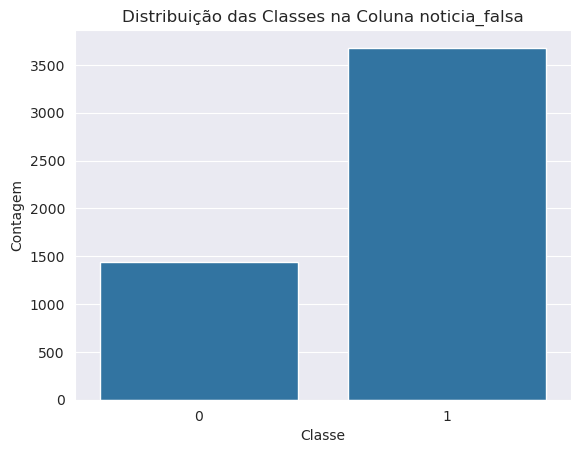

In [12]:
# Configurar o estilo do gráfico
sns.set_style('darkgrid')

# Criar o gráfico de contagem
sns.countplot(x='noticia_falsa', data=combined_df)

# Adicionar rótulos e título
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.title('Distribuição das Classes na Coluna noticia_falsa')
plt.show()

#### Matriz de TF-IDF

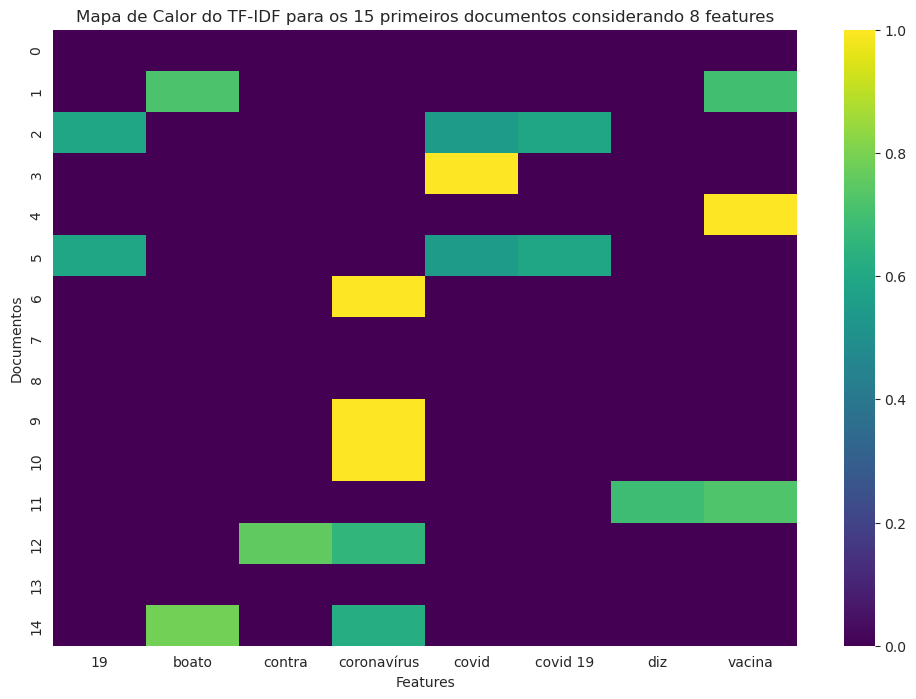

In [13]:
tfidf_dense = tfidf_matrix.todense()

tfidf_df = pd.DataFrame(tfidf_dense, columns=tfidf_vectorizer.get_feature_names_out())

tfidf_sample = tfidf_df.head(15)

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_sample, cmap="viridis", cbar=True, xticklabels=True, yticklabels=True)
plt.title("Mapa de Calor do TF-IDF para os 15 primeiros documentos considerando 8 features")
plt.xlabel("Features")
plt.ylabel("Documentos")
plt.show()

### Divisão Treino e Teste

In [14]:
# Inicialize o TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Garantir que 'title' seja uma string
combined_df['title'] = combined_df['title'].astype(str)

# Verificar se há documentos vazios
non_empty_titles = combined_df['title'].apply(lambda x: len(x.strip()) > 0)

# Checar o resultado
print(non_empty_titles.head())
print("Há documentos vazios?", not non_empty_titles.all())
print("Número de documentos vazios:", (~non_empty_titles).sum())

if non_empty_titles.all():
    # Aplicar TF-IDF
    text_tfidf = tfidf_vectorizer.fit_transform(combined_df['title'])
    print("TF-IDF aplicado com sucesso.")
else:
    print("Há documentos vazios ou apenas stop words.")

print(text_tfidf)

0    True
1    True
2    True
3    True
4    True
Name: title, dtype: bool
Há documentos vazios? False
Número de documentos vazios: 0
TF-IDF aplicado com sucesso.
  (0, 8253)	0.2981787368475802
  (0, 7114)	0.2969207829702879
  (0, 1834)	0.4507949500998072
  (0, 7563)	0.3361039170384623
  (0, 6855)	0.25686626713748767
  (0, 6275)	0.38017081665678903
  (0, 4712)	0.4301387152447609
  (0, 7420)	0.3334908035690892
  (1, 1419)	0.2039199334746507
  (1, 7740)	0.3558903227483889
  (1, 8303)	0.19776322263601587
  (1, 8048)	0.3353664020506611
  (1, 2489)	0.41339391572389705
  (1, 8563)	0.3775973175532309
  (1, 2493)	0.43621550048557217
  (1, 3216)	0.42002332841062934
  (2, 6737)	0.3724359671149896
  (2, 6678)	0.3398920482549445
  (2, 103)	0.11472512445733114
  (2, 2413)	0.1061973006016138
  (2, 6278)	0.2899028673047902
  (2, 1087)	0.3398920482549445
  (2, 1854)	0.230853737705034
  (2, 4259)	0.415456687773818
  (2, 529)	0.3724359671149896
  :	:
  (5121, 6067)	0.36632563318493644
  (5121, 5139)	0.3

In [15]:
X = text_tfidf
y = combined_df['noticia_falsa']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"X_train tamanho: {X_treino.shape}")
print(f"X_test tamanho: {X_teste.shape}")
print(f"y_train tamanho: {y_treino.shape}")
print(f"y_test tamanho: {y_teste.shape}")

X_train tamanho: (4099, 8686)
X_test tamanho: (1025, 8686)
y_train tamanho: (4099,)
y_test tamanho: (1025,)


In [16]:
print(X_treino)

  (0, 3334)	0.3779348950976902
  (0, 645)	0.27959011482942087
  (0, 5460)	0.3483301663199578
  (0, 3795)	0.3014077813632317
  (0, 137)	0.25568859133453825
  (0, 7998)	0.2700595208943484
  (0, 3389)	0.29798910966150727
  (0, 1780)	0.30512408908055383
  (0, 8127)	0.2292490581709703
  (0, 2067)	0.36061723891869624
  (0, 2300)	0.1408475378054623
  (0, 103)	0.10436377401741599
  (0, 2413)	0.09660613691788576
  (0, 1419)	0.15474014328258628
  (1, 6949)	0.456234773414844
  (1, 5871)	0.3995910923298187
  (1, 1800)	0.4089914642576462
  (1, 4337)	0.373253280509291
  (1, 3127)	0.37868559499314863
  (1, 8317)	0.2182823880088517
  (1, 2300)	0.17002807978369844
  (1, 2442)	0.27595728947808906
  (1, 103)	0.12598567480583184
  (1, 2413)	0.11662082427139281
  (2, 6468)	0.4661307291991859
  :	:
  (4095, 6168)	0.2943769927687476
  (4095, 2374)	0.16098476617044397
  (4095, 5933)	0.2755825092125788
  (4095, 6855)	0.28482590365108695
  (4096, 2186)	0.4335061585613114
  (4096, 3728)	0.4072786469864241
  (409

In [17]:
y_treino

1699    0
3467    0
3620    1
4257    1
2346    0
       ..
4426    1
466     1
3092    1
3772    1
860     1
Name: noticia_falsa, Length: 4099, dtype: int64

### Naive Bayes

In [18]:
# Verifique se algum elemento em y_treino ou y_teste é uma lista e achate, se necessário
if any(isinstance(i, list) for i in y_treino):
    y_treino = [item for sublist in y_treino for item in sublist]

if any(isinstance(i, list) for i in y_teste):
    y_teste = [item for sublist in y_teste for item in sublist]

# Agora verifique os rótulos únicos
unique_treino_labels = set(y_treino)
unique_teste_labels = set(y_teste)

print("Rótulos únicos no conjunto de treino:", unique_treino_labels)
print("Rótulos únicos no conjunto de teste:", unique_teste_labels)
print("Rótulos no conjunto de teste que não estão no conjunto de treino:", unique_teste_labels - unique_treino_labels)


Rótulos únicos no conjunto de treino: {0, 1}
Rótulos únicos no conjunto de teste: {0, 1}
Rótulos no conjunto de teste que não estão no conjunto de treino: set()


In [19]:
# Assuming combined_df is your merged DataFrame with a column 'label'
# X = combined_df['title']#.apply(lambda x: " ".join(x))  # Use text as features
# print(X)
# y = combined_df['noticia_falsa']  # Use your label column

# Ensure stratified sampling to maintain label distribution
#X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [20]:
# vectorizer = TfidfVectorizer(max_features=10)  # Número de features pode ser mudado
# X_treino_vectorized = vectorizer.fit_transform(X_treino)
# X_teste_vectorized = vectorizer.transform(X_teste)

# # converter os "labels" para strings
# y_treino = [str(label[0]) if isinstance(label, list) else str(label) for label in y_treino]
# y_teste = [str(label[0]) if isinstance(label, list) else str(label) for label in y_teste]

# # encaixando o label no treino e teste
# label_encoder = LabelEncoder()
# y_combined = y_treino + y_teste  # caber todos os labels
# label_encoder.fit(y_combined)

# y_treino_encoded = label_encoder.transform(y_treino)
# y_teste_encoded = label_encoder.transform(y_teste)

# # Treinamento do modelo Naive Bayes
# naive_bayes_modelo = MultinomialNB()
# naive_bayes_modelo.fit(X_treino_vectorized, y_treino_encoded)

# # Predição
# y_pred = naive_bayes_modelo.predict(X_teste_vectorized)

# # Métricas
# acuracia = accuracy_score(y_teste_encoded, y_pred)
# confusao = confusion_matrix(y_teste_encoded, y_pred)
# classification_rep = classification_report(y_teste_encoded, y_pred)

# print(f"Acurácia: {acuracia:.2f}")

# # Plot da matriz de confusão
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusao, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predito')
# plt.ylabel('Atual')
# plt.title('Matriz de Confusão')
# plt.show()

# print("Classification Report:")
# print(classification_rep)

### Árvore de Decisão

In [21]:
# # Example: Assuming 'corpo_texto' is the text column and 'noticia_falsa' is the label column
# # Your dataset loading code here

# # Combine datasets and make sure 'corpo_texto' is in string format
# combined_df['corpo_texto'] = combined_df['corpo_texto'].apply(lambda x: ' '.join(x))

# # Split the data
# X_treino = combined_df['corpo_texto'][:450]  # Adjust indices as necessary
# X_teste = combined_df['corpo_texto'][450:]
# y_treino = combined_df['noticia_falsa'][:450]
# y_teste = combined_df['noticia_falsa'][450:]

# # Vectorize the text data using TfidfVectorizer
# vectorizer = TfidfVectorizer(max_features=8)  # Adjust max_features if needed
# X_treino_vectorized = vectorizer.fit_transform(X_treino)
# X_teste_vectorized = vectorizer.transform(X_teste)

# # Convert y_treino and y_teste to numpy arrays for compatibility
# y_treino = np.array(y_treino)
# y_teste = np.array(y_teste)

# # Definindo o modelo de árvore de decisão
# arvore_decisao = DecisionTreeClassifier()
# arvore_decisao.fit(X_treino_vectorized, y_treino)

# # Avaliação do modelo
# def avaliar_modelo(modelo, X_teste, y_teste):
#     y_pred = modelo.predict(X_teste)
#     acuracia = accuracy_score(y_teste, y_pred)
#     confusao = confusion_matrix(y_teste, y_pred)
#     classification_rep = classification_report(y_teste, y_pred)

#     return acuracia, confusao, classification_rep

# # Avaliação da Árvore de Decisão
# dt_accuracy, dt_confusion, dt_classification = avaliar_modelo(arvore_decisao, X_teste_vectorized, y_teste)
# print("Acurácia da Árvore de Decisão:", dt_accuracy)
# print("Matriz de Confusão da Árvore de Decisão:\n", dt_confusion)
# print("Classification Report da Árvore de Decisão:\n", dt_classification)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(dt_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Falso', 'Verdadeiro'], yticklabels=['Falso', 'Verdadeiro'])
# plt.xlabel('Predito')
# plt.ylabel('Atual')
# plt.title('Matriz de Confusão')
# plt.show()

In [22]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_treino, y_treino)

def avaliar_modelo(modelo, X_teste, y_teste):
    y_pred = modelo.predict(X_teste)
    acuracia = accuracy_score(y_teste, y_pred)
    confusao = confusion_matrix(y_teste, y_pred)
    classification_rep = classification_report(y_teste, y_pred)

    return acuracia, confusao, classification_rep

dt_accuracy, dt_confusion, dt_classification = avaliar_modelo(decision_tree, X_teste, y_teste)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_confusion)
print("Decision Tree Classification Report:\n", dt_classification)

Decision Tree Accuracy: 0.855609756097561
Decision Tree Confusion Matrix:
 [[241  53]
 [ 95 636]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77       294
           1       0.92      0.87      0.90       731

    accuracy                           0.86      1025
   macro avg       0.82      0.84      0.83      1025
weighted avg       0.86      0.86      0.86      1025



### Classificador Passivo Agressivo

Acurácia do Passive Aggressive Classifier: 0.8946341463414634
Matriz de Confusão do Passive Aggressive Classifier:
 [[220  74]
 [ 34 697]]
Classification Report do Passive Aggressive Classifier:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       294
           1       0.90      0.95      0.93       731

    accuracy                           0.89      1025
   macro avg       0.89      0.85      0.87      1025
weighted avg       0.89      0.89      0.89      1025



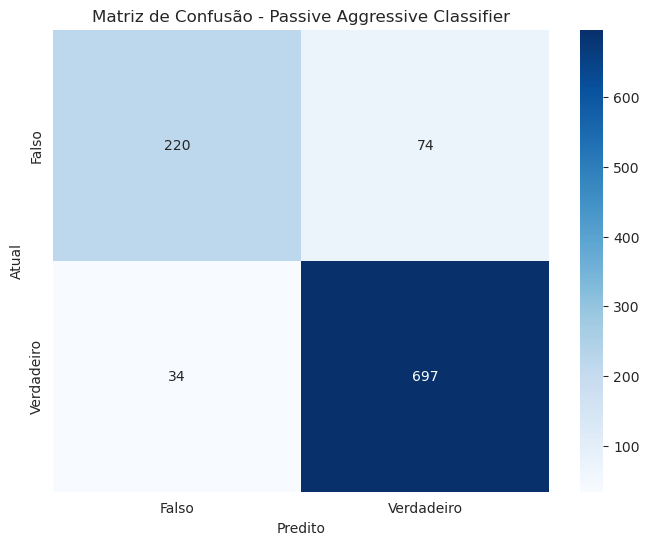

In [23]:
# Treino Passivo Agressivo
passive_agressive = PassiveAggressiveClassifier()
passive_agressive.fit(X_treino, y_treino)

# Avaliação do classificador
pac_accuracy, pac_confusion, pac_classification = avaliar_modelo(passive_agressive, X_teste, y_teste)
print("Acurácia do Passive Aggressive Classifier:", pac_accuracy)
print("Matriz de Confusão do Passive Aggressive Classifier:\n", pac_confusion)
print("Classification Report do Passive Aggressive Classifier:\n", pac_classification)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(pac_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Falso', 'Verdadeiro'], yticklabels=['Falso', 'Verdadeiro'])
plt.xlabel('Predito')
plt.ylabel('Atual')
plt.title('Matriz de Confusão - Passive Aggressive Classifier')
plt.show()


### Floresta Aleatória

In [24]:
# Definindo o modelo da floresta

random_forest = RandomForestClassifier(n_estimators=739)
random_forest.fit(X_treino, y_treino)

rf_accuracy, rf_confusion, rf_classification = avaliar_modelo(random_forest, X_teste, y_teste)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion)
print("Random Forest Classification Report:\n", rf_classification)

Random Forest Accuracy: 0.9053658536585366
Random Forest Confusion Matrix:
 [[217  77]
 [ 20 711]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82       294
           1       0.90      0.97      0.94       731

    accuracy                           0.91      1025
   macro avg       0.91      0.86      0.88      1025
weighted avg       0.91      0.91      0.90      1025



### Regressão Logística

In [25]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_treino, y_treino)

lr_accuracy, lr_confusion, lr_classification = avaliar_modelo(logistic_regression, X_teste, y_teste)

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", lr_confusion)
print("Logistic Regression Classification Report:\n", lr_classification)

Logistic Regression Accuracy: 0.8682926829268293
Logistic Regression Confusion Matrix:
 [[161 133]
 [  2 729]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.55      0.70       294
           1       0.85      1.00      0.92       731

    accuracy                           0.87      1025
   macro avg       0.92      0.77      0.81      1025
weighted avg       0.89      0.87      0.85      1025



### GBM

In [26]:
# Inicialização do modelo
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=13)

# Treinar o modelo
gbm.fit(X_treino, y_treino)

#predição
y_pred = gbm.predict(X_teste)

# Avaliar o modelo
mse = mean_squared_error(y_teste, y_pred)
mae = mean_absolute_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.1020929635947707
Mean Absolute Error: 0.23834656503184862
R^2 Score: 0.5009100390074356


#### XGBoost

In [27]:
xgb = XGBClassifier(n_estimators = 20, max_depth = 6, learning_rate = 0.1, subsample = 0.8, random_state = 10)

xgb.fit(X_treino, y_treino)

y_pred = xgb.predict(X_teste)

# DataFrame com os dados
df_xgb = pd.DataFrame(data={'Rótulo Atual': y_teste, 'Rótulo Predito:': y_pred}).head(50)

xgb_accuracy, xgb_confusion, xgb_classification = avaliar_modelo(xgb, X_teste, y_teste)

display(df_xgb)
print("XGB Accuracy:", xgb_accuracy)
print("XGB Confusion Matrix:\n", xgb_confusion)
print("XGB Classification Report:\n", xgb_classification)

,Rótulo Atual,Rótulo Predito:
530,0,1
1730,1,1
1010,1,1
1149,1,1
1383,1,1
4914,1,1
4381,0,1
2978,1,1
3970,0,0
1864,0,0


XGB Accuracy: 0.8468292682926829
XGB Confusion Matrix:
 [[139 155]
 [  2 729]]
XGB Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.47      0.64       294
           1       0.82      1.00      0.90       731

    accuracy                           0.85      1025
   macro avg       0.91      0.74      0.77      1025
weighted avg       0.87      0.85      0.83      1025



### Name Entity Recognition - NER

In [28]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/ABTLUS/pedro220058/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /home/ABTLUS/pedro220058/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/ABTLUS/pedro220058/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ABTLUS/pedro220058/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [29]:
# Certifique-se de que todos os títulos são strings
combined_df['title'] = combined_df['title'].astype(str)

# Criar uma lista para armazenar os resultados
entities_list = []

# Iterar sobre cada título no dataframe
for title in combined_df['title']:
    if isinstance(title, str):  # Verificar se o título é uma string
        tokens = word_tokenize(title)  # Tokenizar o título em palavras
        tagged_tokens = pos_tag(tokens)  # Fazer a marcação de POS nos tokens
        entities = ne_chunk(tagged_tokens)  # Reconhecimento de entidades nomeadas
        entities_list.append(entities)  # Adicionar o resultado à lista
    else:
        print(f"Título inválido encontrado: {title}")

# Exibir as entidades nomeadas para cada título
for entities in entities_list:
    print(entities)

(S
  (GPE Rússia/NNP)
  introduz/NN
  período/NN
  quarentena/VBD
  2/CD
  semanas/NNS
  chegadas/VBP
  (PERSON Reino/NNP Unido/NNP))
(S
  Empresários/NNS
  (PERSON Cuiabá/NNP)
  vão/NN
  (GPE Cuba/NNP)
  tomar/NN
  vacina/NN
  (PERSON Sputnik/NNP V/NNP)
  #/#
  boato/NN)
(S
  (ORGANIZATION FBI/NNP)
  acusa/NN
  hackers/NNS
  (GPE China/NNP)
  atacar/NN
  pesquisa/NN
  covid-19/JJ
  promete/NN
  provas/NN)
(S
  Pesquisadores/NNS
  culpam/VBP
  (PERSON Bolsonaro/NNP)
  crise/NN
  covid/NN
  dizem/NN
  'ignorados/POS
  '/'')
(S vacina/NN)
(S
  (GPE Mundo/NNP)
  supera/NN
  marca/NN
  100/CD
  milhões/NN
  casos/NN
  covid-19/NN
  ,/,
  aponta/NN
  (ORGANIZATION OMS/NNP))
(S
  (PERSON Casa/NNP)
  (PERSON Branca/NNP)
  adia/VBZ
  visita/JJ
  chanceler/NN
  (GPE Áustria/NNP)
  devido/NN
  coronavírus/NN)
(S
  aumento/IN
  cobertura/JJ
  vacinal/JJ
  alagoas/NN
  ajuda/NN
  brasil/NN
  sair/NN
  lista/VBZ
  20/CD
  países/NNS
  crianças/VBP
  vacinadas/NNS)
(S
  Mapa/NNP
  online/PRP
  mostr

In [30]:
# Importar spaCy e displacy
import spacy
from spacy import displacy

# Carregar o modelo de linguagem para português (ou outro idioma relevante)
nlp = spacy.load('pt_core_news_sm')  # Certifique-se de que o modelo está instalado

# Concatenar todos os textos em um só (ou usar um texto específico)
for i in range(4):
    all_texts = combined_df['title'].values[i]

# Processar o texto usando spaCy
    doc = nlp(all_texts)

# Visualizar as dependências sintáticas no Jupyter
    displacy.render(doc, style='dep', jupyter=True)

### Validação e Avaliação do Modelo

In [31]:
# Testando e avaliando a regressão logística
lr_test_predicitions = logistic_regression.predict(X_teste)
lr_test_precision = precision_score(y_teste, lr_test_predicitions)
lr_test_recall = recall_score(y_teste, lr_test_predicitions)
lr_test_f1 = f1_score(y_teste, lr_test_predicitions)

# Floresta Aleatória
rf_test_predicitions = random_forest.predict(X_teste)
rf_test_precision = precision_score(y_teste, rf_test_predicitions)
rf_test_recall = recall_score(y_teste, rf_test_predicitions)
rf_test_f1 = f1_score(y_teste, rf_test_predicitions)

# Passivo Agressivo
pa_test_predicitions = passive_agressive.predict(X_teste)
pa_test_precision = precision_score(y_teste, pa_test_predicitions)
pa_test_recall = recall_score(y_teste, pa_test_predicitions)
pa_test_f1 = f1_score(y_teste, pa_test_predicitions)

# Árvore de Decisão
dt_test_predicitions = decision_tree.predict(X_teste)
dt_test_precision = precision_score(y_teste, dt_test_predicitions)
dt_test_recall = recall_score(y_teste, dt_test_predicitions)
dt_test_f1 = f1_score(y_teste, dt_test_predicitions)

# Printando os resultados
print("Precisão do teste de Regressão Logística:", lr_test_precision)
print("Recall do teste de Regressão Logística:", lr_test_recall)
print("F1 Score da Regressão Logística:", lr_test_f1)
print()
print("Precisão do teste da Floresta Aleatória:", rf_test_precision)
print("Recall do teste da Floresta Aleatória:", rf_test_recall)
print("F1 Score da Floresta Aleatória:", rf_test_f1)
print()
print("Precisão do teste do Classificador Passivo Agressivo:", pa_test_precision)
print("Recall do teste do Classificador Passivo Agressivo:", pa_test_recall)
print("F1 Score do Classificador Passivo Agressivo:", pa_test_f1)
print()
print("Precisão do teste da Árvore de Decisão:", dt_test_precision)
print("Recall do teste da Árvore de Decisão:", dt_test_recall)
print("F1 Score da Árvore de Decisão:", dt_test_f1)

Precisão do teste de Regressão Logística: 0.845707656612529
Recall do teste de Regressão Logística: 0.9972640218878249
F1 Score da Regressão Logística: 0.9152542372881356

Precisão do teste da Floresta Aleatória: 0.9022842639593909
Recall do teste da Floresta Aleatória: 0.9726402188782489
F1 Score da Floresta Aleatória: 0.9361421988150099

Precisão do teste do Classificador Passivo Agressivo: 0.9040207522697795
Recall do teste do Classificador Passivo Agressivo: 0.9534883720930233
F1 Score do Classificador Passivo Agressivo: 0.9280958721704394

Precisão do teste da Árvore de Decisão: 0.9230769230769231
Recall do teste da Árvore de Decisão: 0.8700410396716827
F1 Score da Árvore de Decisão: 0.895774647887324


### Plots

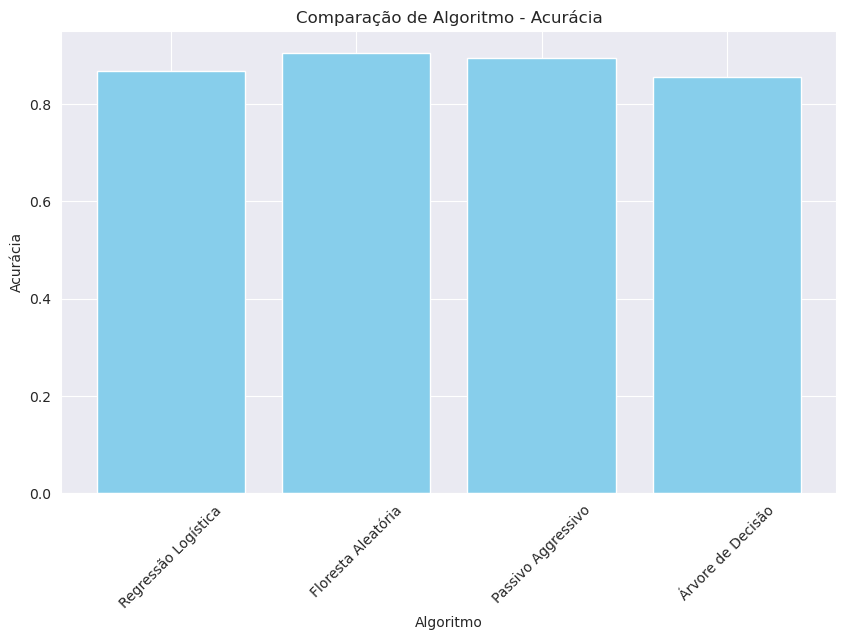

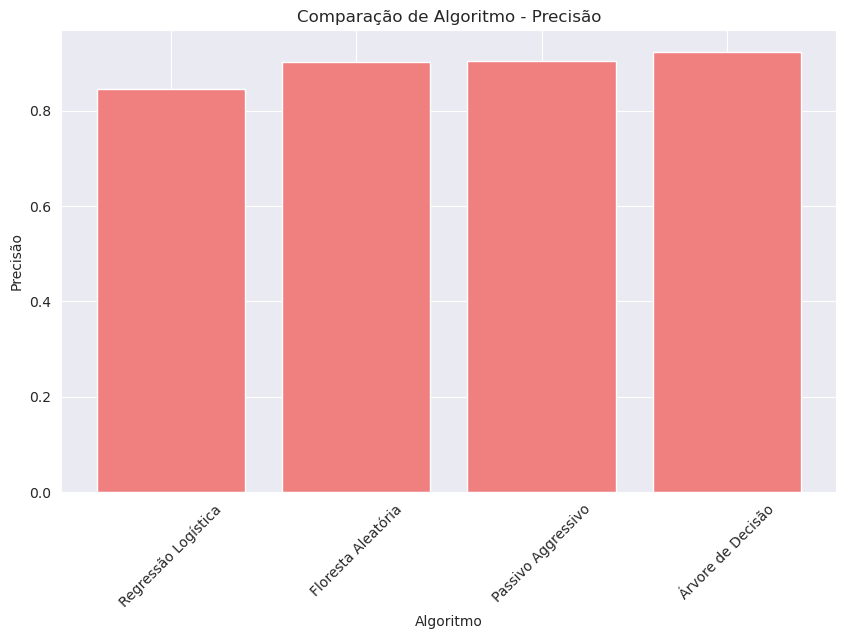

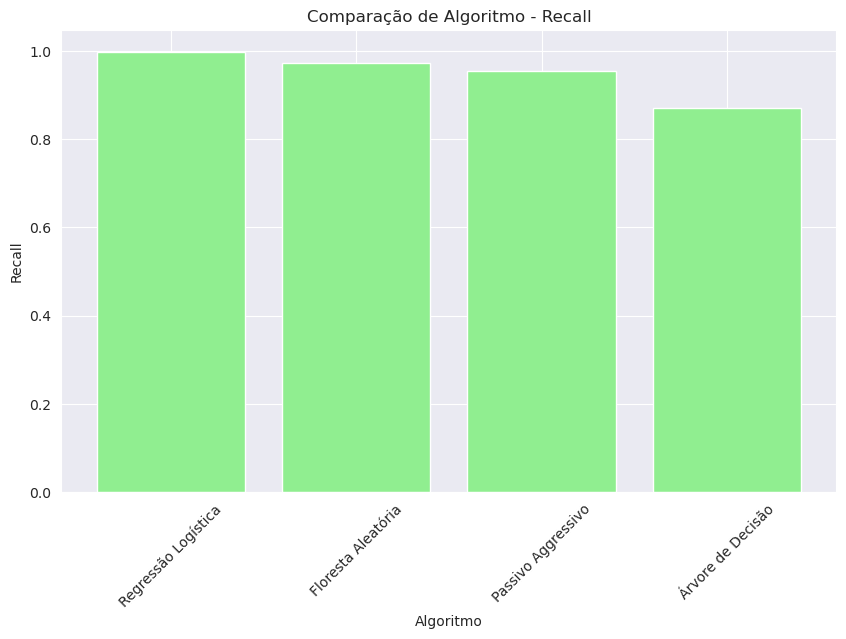

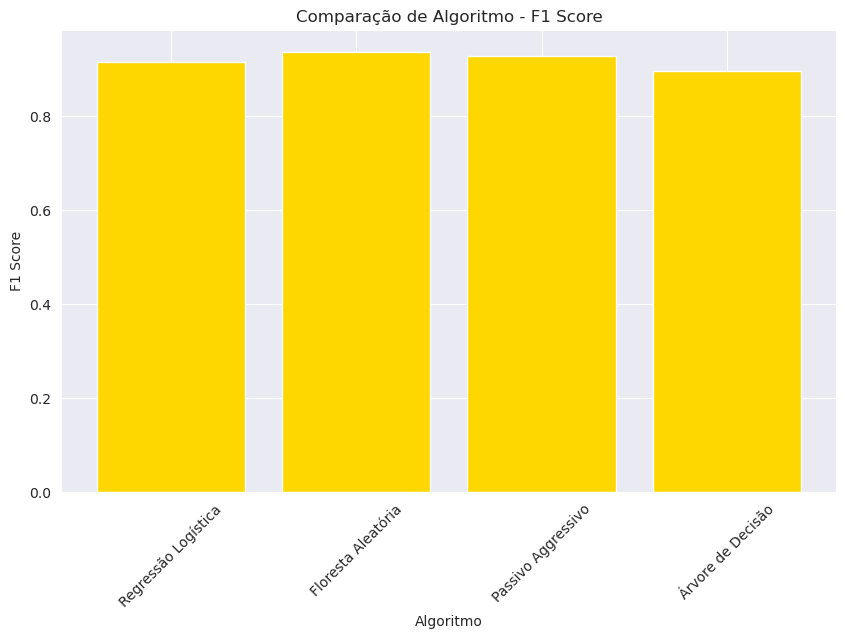

In [32]:
# Define the algorithm names and their corresponding metrics
algorithms = ['Regressão Logística', 'Floresta Aleatória', 'Passivo Aggressivo', 'Árvore de Decisão']
accuracies = [lr_accuracy, rf_accuracy, pac_accuracy, dt_accuracy]
precisions = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision]
recalls = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1]

# Create a bar chart for accuracy
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia')
plt.title('Comparação de Algoritmo - Acurácia')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for precision
plt.figure(figsize=(10, 6))
plt.bar(algorithms, precisions, color='lightcoral')
plt.xlabel('Algoritmo')
plt.ylabel('Precisão')
plt.title('Comparação de Algoritmo - Precisão')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for recall
plt.figure(figsize=(10, 6))
plt.bar(algorithms, recalls, color='lightgreen')
plt.xlabel('Algoritmo')
plt.ylabel('Recall')
plt.title('Comparação de Algoritmo - Recall')
plt.xticks(rotation=45)
plt.show()

# Create a bar chart for F1 score
plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_scores, color='gold')
plt.xlabel('Algoritmo')
plt.ylabel('F1 Score')
plt.title('Comparação de Algoritmo - F1 Score')
plt.xticks(rotation=45)
plt.show()

<Figure size 1600x1200 with 0 Axes>

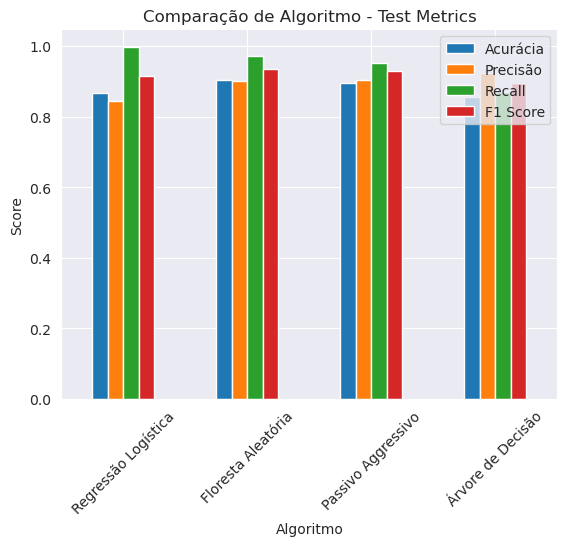

In [33]:
# Define the algorithm names and their corresponding metrics
algorithms = ['Regressão Logística', 'Floresta Aleatória', 'Passivo Aggressivo', 'Árvore de Decisão']
accuracy_scores = [lr_accuracy, rf_accuracy, pac_accuracy, dt_accuracy]
precision_scores = [lr_test_precision, rf_test_precision, pa_test_precision, dt_test_precision]
recall_scores = [lr_test_recall, rf_test_recall, pa_test_recall, dt_test_recall]
f1_scores = [lr_test_f1, rf_test_f1, pa_test_f1, dt_test_f1]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algoritmo': algorithms,
    'Acurácia': accuracy_scores,
    'Precisão': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Set the algorithm column as the index for plotting
results_df.set_index('Algoritmo', inplace=True)

# Create a bar chart for all metrics
plt.figure(figsize=(16, 12))
results_df.plot(kind='bar', stacked=False)
plt.xlabel('Algoritmo')
plt.ylabel('Score')
plt.title('Comparação de Algoritmo - Test Metrics')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


### Validação do Modelo

In [34]:
def predict_title(title_text):
    # pré processamento
    preprocessed_title_text = title_text.lower()
    preprocessed_title_text = nltk.word_tokenize(preprocessed_title_text)
    preprocessed_title_text = [word for word in preprocessed_title_text if word not in stop_words]

    tfidf_vector = tfidf_vectorizer.transform(preprocessed_title_text)

    prediction = decision_tree.predict(tfidf_vector)

    return prediction[0]

for index, titulo in enumerate(combined_df['title']):
    prediction = predict_title(titulo)
    
    if prediction == 1:
        print(f"Índice {index}: Título '{titulo}' - a notícia é provavelmente verdadeira.")
    else:
        print(f"Índice {index}: Título '{titulo}' - a notícia é provavelmente falsa.")

Índice 0: Título 'Rússia introduz período quarentena 2 semanas chegadas Reino Unido' - a notícia é provavelmente falsa.
Índice 1: Título 'Empresários Cuiabá vão Cuba tomar vacina Sputnik V #boato' - a notícia é provavelmente falsa.
Índice 2: Título 'FBI acusa hackers China atacar pesquisa covid-19 promete provas' - a notícia é provavelmente falsa.
Índice 3: Título 'Pesquisadores culpam Bolsonaro crise covid dizem 'ignorados'' - a notícia é provavelmente falsa.
Índice 4: Título 'vacina' - a notícia é provavelmente verdadeira.
Índice 5: Título 'Mundo supera marca 100 milhões casos covid-19, aponta OMS' - a notícia é provavelmente falsa.
Índice 6: Título 'Casa Branca adia visita chanceler Áustria devido coronavírus' - a notícia é provavelmente verdadeira.
Índice 7: Título 'aumento cobertura vacinal alagoas ajuda brasil sair lista 20 países crianças vacinadas' - a notícia é provavelmente falsa.
Índice 8: Título 'Mapa online mostra livrarias abertas Brasil durante quarentena' - a notícia é 

In [35]:
# Ler o arquivo de texto delimitado por tabulações
df_v_f = pd.read_csv('Notícias Fake e Verdadeiras.txt', delimiter='\t', header=None)

# Exibir o DataFrame
display(df_v_f)

,0,1,2
0,1,Vacinas contra a Covid-19 são mais perigosas q...,0
1,2,Vacina tem como objetivo matar seres humanos,0
2,3,Profissionais de saúde morrem por ataque cardí...,0
3,4,Butantan não confirma eficácia da CoronaVac em...,0
4,5,Vacinas de RNA mensageiro vão provocar morte e...,0
5,6,A vacina contra a Covid-19 vai modificar o DNA...,0
6,7,A vacina contra a Covid-19 tem chip líquido e ...,0
7,8,Imunizantes contra Covid-19 estão relacionados...,0
8,9,Vacinas contra Covid-19 criam campo magnético ...,0
9,10,CoronaVac não tem comprovação científica,0


In [37]:
lista_0_1 = []

for index, titulo in enumerate(df_v_f[1]):
    prediction = predict_title(titulo)
    
    if prediction == 1:
        print(f"Índice {index}: Título '{titulo}' - a notícia é provavelmente verdadeira.")
        lista_0_1.append(1)
    else:
        print(f"Índice {index}: Título '{titulo}' - a notícia é provavelmente falsa.")
        lista_0_1.append(0)

# Exibir a lista para verificar
print("Lista de índices com valores 0 e 1:", lista_0_1)

Índice 0: Título 'Vacinas contra a Covid-19 são mais perigosas que o próprio vírus' - a notícia é provavelmente falsa.
Índice 1: Título 'Vacina tem como objetivo matar seres humanos' - a notícia é provavelmente verdadeira.
Índice 2: Título 'Profissionais de saúde morrem por ataque cardíaco em decorrência da vacina' - a notícia é provavelmente falsa.
Índice 3: Título 'Butantan não confirma eficácia da CoronaVac em idosos' - a notícia é provavelmente falsa.
Índice 4: Título 'Vacinas de RNA mensageiro vão provocar morte em massa entre idoso' - a notícia é provavelmente falsa.
Índice 5: Título 'A vacina contra a Covid-19 vai modificar o DNA dos seres humanos' - a notícia é provavelmente verdadeira.
Índice 6: Título 'A vacina contra a Covid-19 tem chip líquido e inteligência artificial para controle populacional' - a notícia é provavelmente verdadeira.
Índice 7: Título 'Imunizantes contra Covid-19 estão relacionados à transmissão de HIV' - a notícia é provavelmente falsa.
Índice 8: Título '

In [43]:
# Adicionar a lista como uma nova coluna no DataFrame
df_v_f['predicao'] = lista_0_1
df_v_f[2] = df_v_f["noticia_falsa"]

# Exibir o DataFrame atualizado para verificar
display(df_v_f)

,0,1,2,predicao,noticia_falsa
0,1,Vacinas contra a Covid-19 são mais perigosas q...,0,0,0
1,2,Vacina tem como objetivo matar seres humanos,0,1,0
2,3,Profissionais de saúde morrem por ataque cardí...,0,0,0
3,4,Butantan não confirma eficácia da CoronaVac em...,0,0,0
4,5,Vacinas de RNA mensageiro vão provocar morte e...,0,0,0
5,6,A vacina contra a Covid-19 vai modificar o DNA...,0,1,0
6,7,A vacina contra a Covid-19 tem chip líquido e ...,0,1,0
7,8,Imunizantes contra Covid-19 estão relacionados...,0,0,0
8,9,Vacinas contra Covid-19 criam campo magnético ...,0,0,0
9,10,CoronaVac não tem comprovação científica,0,1,0
